In [1]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Visual styling
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
print("Banking Systems Online. Ready for Loan Analysis.")

Banking Systems Online. Ready for Loan Analysis.


In [3]:
# Cell 2: Load Data
# Using a stable dataset from kaggle for the standard Loan Prediction Dataset
df = pd.read_csv('/content/loan_dataset.csv')

print("First 5 rows of Loan Applications:")
print(df.head())

# --- DATA CLEANING (The 'Janitor' Work) ---
# 1. Fill Missing Values
# For Categorical (Gender, Married), fill with Mode (Most Common)
# For Numerical (LoanAmount), fill with Median
cols_cat = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
cols_num = ['LoanAmount', 'Loan_Amount_Term']

for col in cols_cat:
    df[col] = df[col].fillna(df[col].mode()[0])

for col in cols_num:
    df[col] = df[col].fillna(df[col].median())

# 2. Fix the "3+" bug in Dependents
# The dataset has "0", "1", "2", "3+". We need to make "3+" a number.
df['Dependents'] = df['Dependents'].replace('3+', 4)

print("\nData Cleaned. Missing values fixed.")

First 5 rows of Loan Applications:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural

In [4]:
# Cell 3: Label Encoding
# We use LabelEncoder to turn "Yes" -> 1, "No" -> 0, etc.

le = LabelEncoder()
cols_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

# Check the result
print("Transformed Data (Computers can read this now):")
print(df.head())

Transformed Data (Computers can read this now):
    Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       1        0          0          0              0   
1  LP001003       1        1          1          0              0   
2  LP001005       1        1          0          0              1   
3  LP001006       1        1          0          1              0   
4  LP001008       1        0          0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             

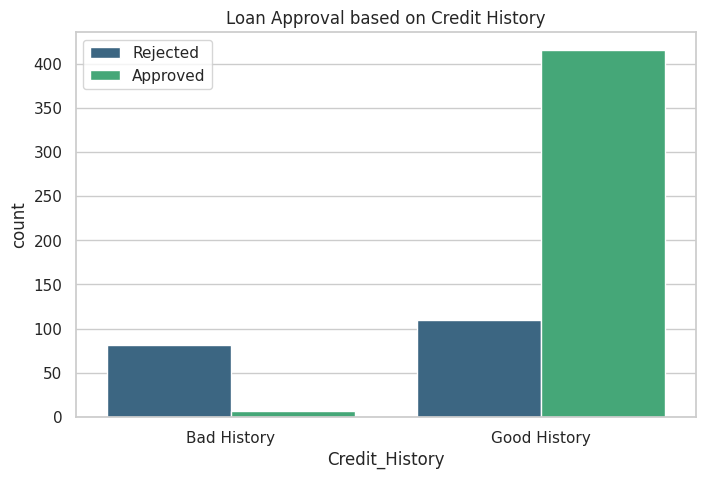

In [5]:
# Cell 4: Visualization
# 1 = Good Credit History, 0 = Bad Credit History
# Loan Status: 1 = Approved (Y), 0 = Rejected (N)

plt.figure(figsize=(8, 5))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='viridis')
plt.title("Loan Approval based on Credit History")
plt.xticks([0, 1], ['Bad History', 'Good History'])
plt.legend(['Rejected', 'Approved'])
plt.show()

In [6]:
# Cell 5: Training
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1) # Features
y = df['Loan_Status'] # Target (Approve/Reject)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compare Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=3) # max_depth prevents overfitting
}

print("Training Models...\n")

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc*100:.2f}%")

Training Models...

Logistic Regression Accuracy: 78.86%
Decision Tree Accuracy: 76.42%


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


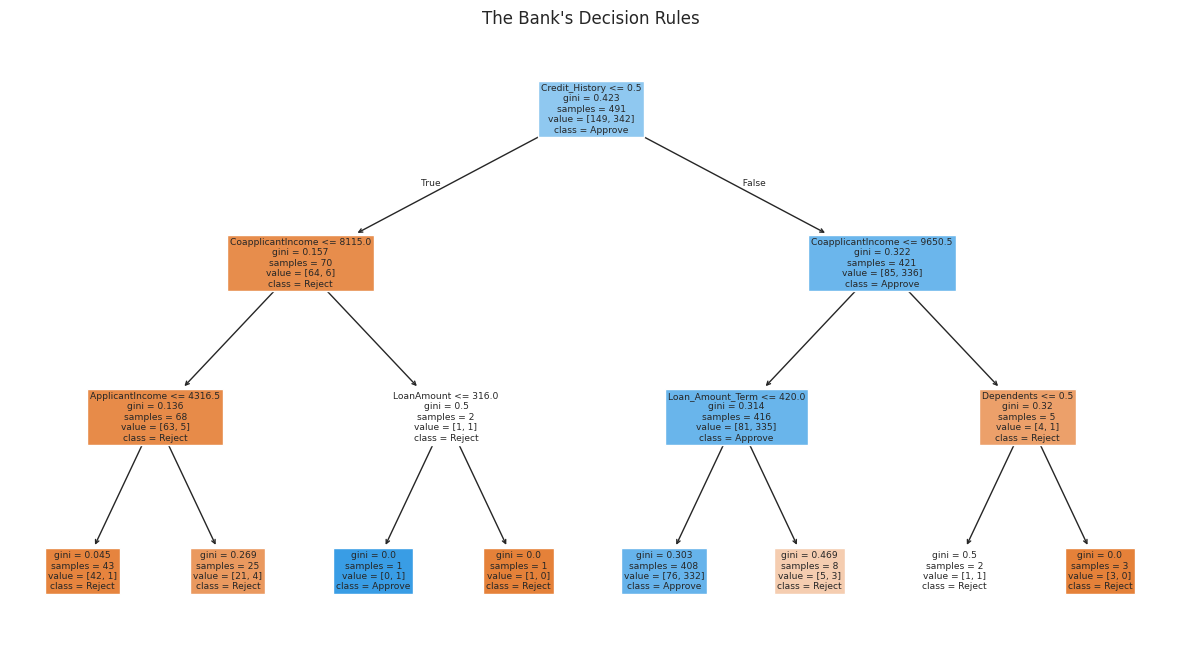

In [7]:
# Cell 6: Visualizing the Logic
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 8))
dt_model = models["Decision Tree"]
plot_tree(dt_model, feature_names=X.columns, class_names=['Reject', 'Approve'], filled=True)
plt.title("The Bank's Decision Rules")
plt.show()